In [11]:
# importing PIL Module
from PIL import Image

import numpy as np
from pathlib import Path
import cv2
import os
import glob

* Path

In [47]:
path_dir = 'C:/Users/starlabs/Desktop/BoneScan/Bone_Scan_Data/convert_ant_post/POST/*'
path_flip = 'C:/data/Post_flip/'
path_sample = 'C:/data/bonescan_post_concat.png'

* Flip Images of 6446p - Pillow

In [42]:
if not(os.path.isdir(path_out)): 
    os.makedirs(os.path.join(path_out))

In [38]:
name1 = []
for i in glob.glob(path_dir):
    name1.append(os.path.basename(i))

In [44]:
for i in glob.glob(path_dir):
    # open the original image
    img = Image.open(i)
    # Flip the original image horizontally
    fname = os.path.basename(i)
    flip_img = img.transpose(Image.FLIP_LEFT_RIGHT)
    flip_img.save((os.path.join(path_flip, fname)))

In [ ]:
# open the original image
img = Image.open(path)

# Flip the original image horizontally
flip_img = img.transpose(Image.FLIP_LEFT_RIGHT)
flip_img.save((os.path.join(path_out, i, '.png')))

In [68]:
img_arr[:,:,0] = np.array(img1)

ValueError: shape mismatch: value array of shape (1024,256,2) could not be broadcast to indexing result of shape (1024,256,1)

In [58]:
img_arr.shape

(1024, 256, 2)

In [53]:
img1 = Image.open(path_sample)

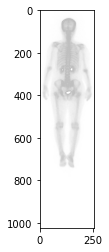

In [63]:
import matplotlib.pyplot as plt
plt.imshow(img1)

* ANT, POST 경로설정

In [103]:
#ANT파일과 POST파일을 불러옵니다.
data_dir = 'C:/Users/starlabs/Desktop/BoneScan/Bone_Scan_Data/convert_ant_post/'
#ant_dir = glob.glob(os.path.join(data_dir, 'ANT/*.*'))
ant_dir = glob.glob(data_dir + 'ANT/*')
#post_dir = glob.glob(data_dir + '/POST/*.*')

In [108]:
len(ant_dir)

6446

### post & flip Image open 후 np.array변환

In [107]:
#ANT파일을 기준으로 이미지를 읽습니다.
#만약 파일 변환에 문제가 있어 ANT파일과 POST파일의 목록이 다를경우 오류를 방지합니다.
for i in ant_dir:
    #ANT이미지를 불러옵니다.
    #ant_img = cv2.imread(i)
    ant_img = Image.open(i.replace('\\','/'))
    #ANT이미지에서 POST로 이름을 바꿔 POST도 불러옵니다.
    #post_img = cv2.imread(i.replace('ANT','Post_flip'))
    post_img = i.replace('ANT\\','Post_flip/')
    post_img = Image.open(post_img.replace('_ANT','_POST'))
    
    #두 이미지 np.array 변환
    ant_img = np.array(ant_img, dtype='uint8')
    post_img = np.array(post_img, dtype='uint8')
    
    #두 이미지를 합칩니다.
    #done_img = cv2.hconcat([ant_img,post_img])
    img_concat = np.dstack([ant_img,post_img])
    
    #합친 이미지를 저장합니다.
    #cv2.imwrite(path + done_folder + '/' + os.path.basename(i),done_img)
    img = Image.fromarray(img_concat)
    img.save(data_dir + '/Concat/' + os.path.basename(i))
    

(참고) OPEN > CONCAT > SAVE

In [ ]:
# open the image
img_post = Image.open(os.path.join(path_dir,'bonescan_post_sample.png'))
img_flip = Image.open(os.path.join(path_dir,'bonescan_post_flipped.png'))
img_post = np.array(img, dtype='uint8')
img_flip = np.array(img, dtype='uint8')

print(img_post.shape)
print(img_flip.shape)

# concat하기 depth축으로
img_concat = np.dstack([img_post,img_flip])
# img_concat = np.concatenate((img_post,img_flip), axis=2)

img_concat.shape

# Image save하기
img = Image.fromarray(img_concat)
img.save(os.path.join(path_dir,'bonescan_post_concat.png'))
img.show()

* (참고) RGB 채널 분리, 병합

* cv2.merge  

채널 병합 함수(cv2.merge)로 분리된 채널을 병합해 하나의 이미지로 합칠 수 있습니다.
dst = cv2.merge(mv)로 단일 채널 이미지 배열(mv)를 병합해 출력 이미지(dst)를 생성합니다.
채널을 변형한 뒤에 다시 합치거나 순서를 변경해 병합할 수 있습니다.
순서가 변경될 경우, 원본 이미지와 다른 색상으로 표현될 수 있습니다.

In [ ]:
image = cv2.imread(args["image"])
(B, G, R) = cv2.split(image)
# show each channel individually
cv2.imshow("Red", R)
cv2.imshow("Green", G)
cv2.imshow("Blue", B)
cv2.waitKey(0)

In [ ]:
cv2.merge((r, g, b))